# Iris Flower Supervised Classification ML Project

Author: Parth Salke

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv("C:\\Users\\Parth Salke\\Downloads\\Datasets\\Iris.csv")

# Exploratory Data Analysis

In [3]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape

(150, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

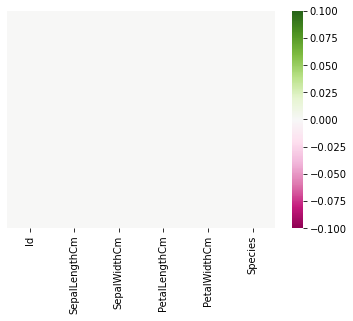

In [7]:
sns.heatmap(dataset.isnull(),yticklabels=False, cmap="PiYG")

In [8]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


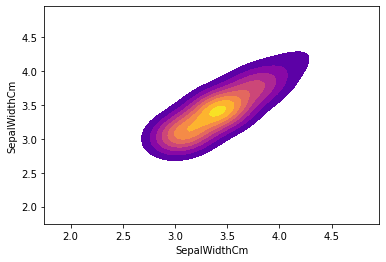

In [33]:
setosa=dataset[dataset['Species']=='Iris-setosa']
sns.kdeplot(setosa['SepalWidthCm'],setosa['SepalWidthCm'],
           cmap="plasma",shade=True,shade_lowest=False)

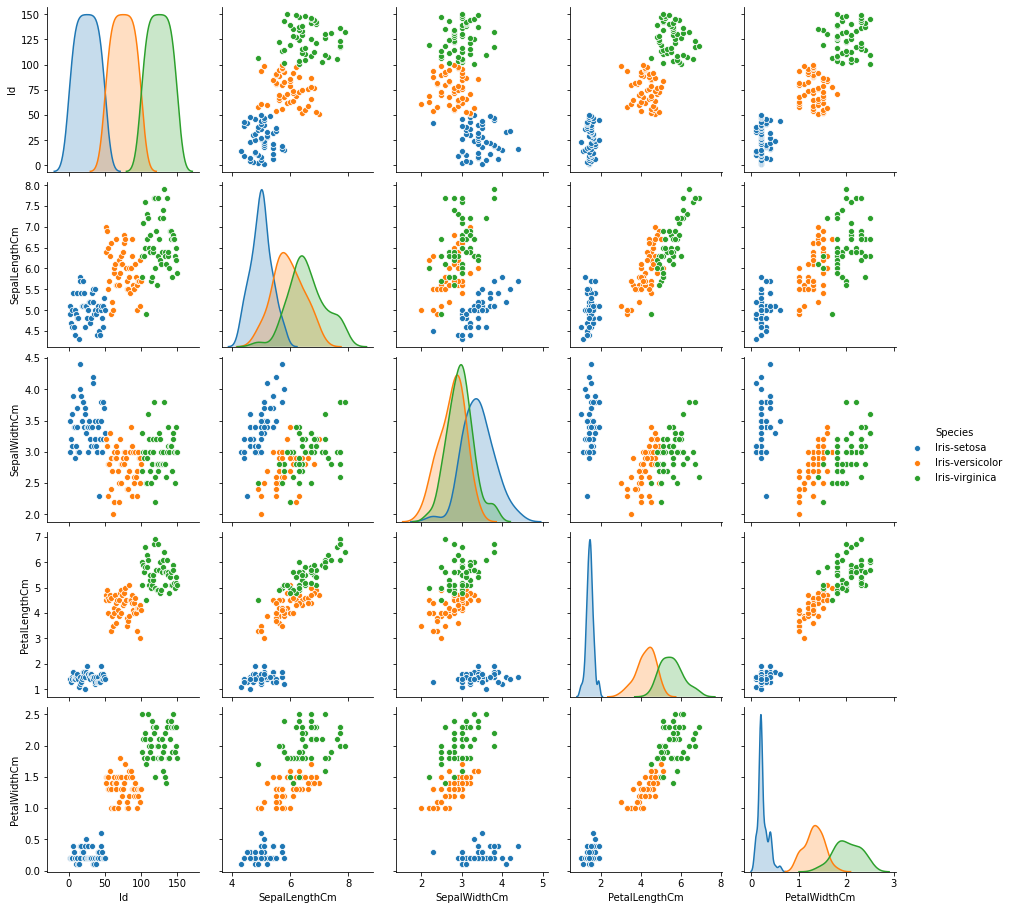

In [15]:
sns.pairplot(dataset,hue='Species')
plt.show()

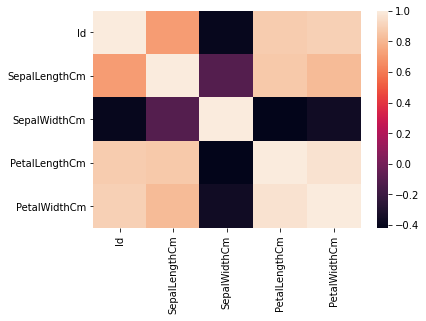

In [42]:
sns.heatmap(dataset.corr())

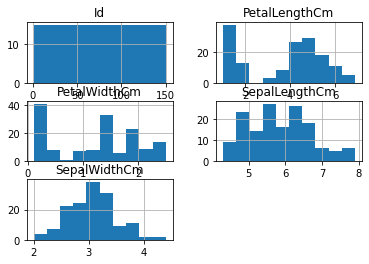

In [12]:
dataset.hist()
plt.show()

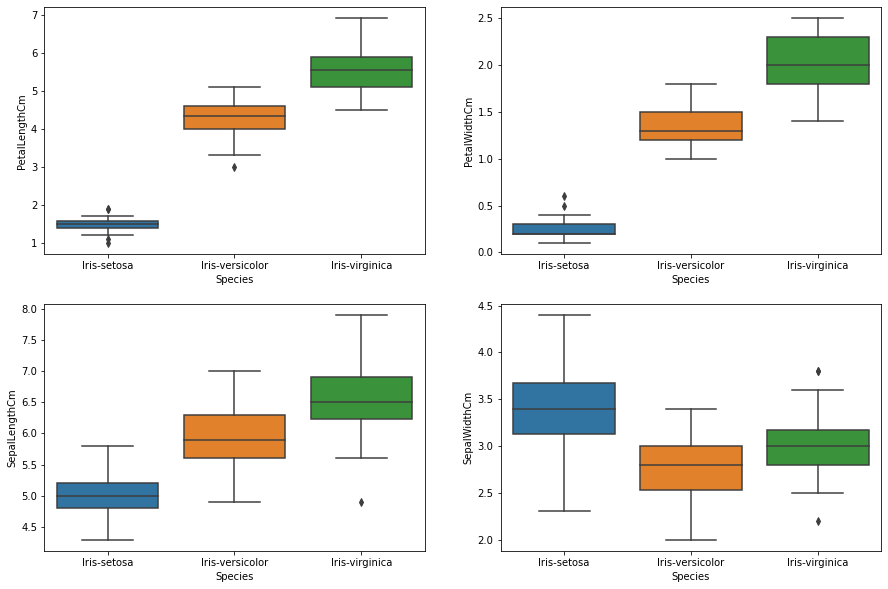

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=dataset)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=dataset)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=dataset)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=dataset)
plt.show()

# Scaling the data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
scaler.fit(dataset.drop('Species',axis=1))

StandardScaler()

In [37]:
scaled_features=scaler.transform(dataset.drop('Species',axis=1))

In [38]:
iris_feat=pd.DataFrame(scaled_features,columns=dataset.columns[:-1])
iris_feat.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


# Train & Test Data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [41]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, dataset['Species'], test_size=0.20, random_state=42)

# Decision Tree Classifier

In [43]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [49]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=dtree.predict(X_test)
print('Classification report-\n',classification_report(y_test,y_pred))

Classification report-
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



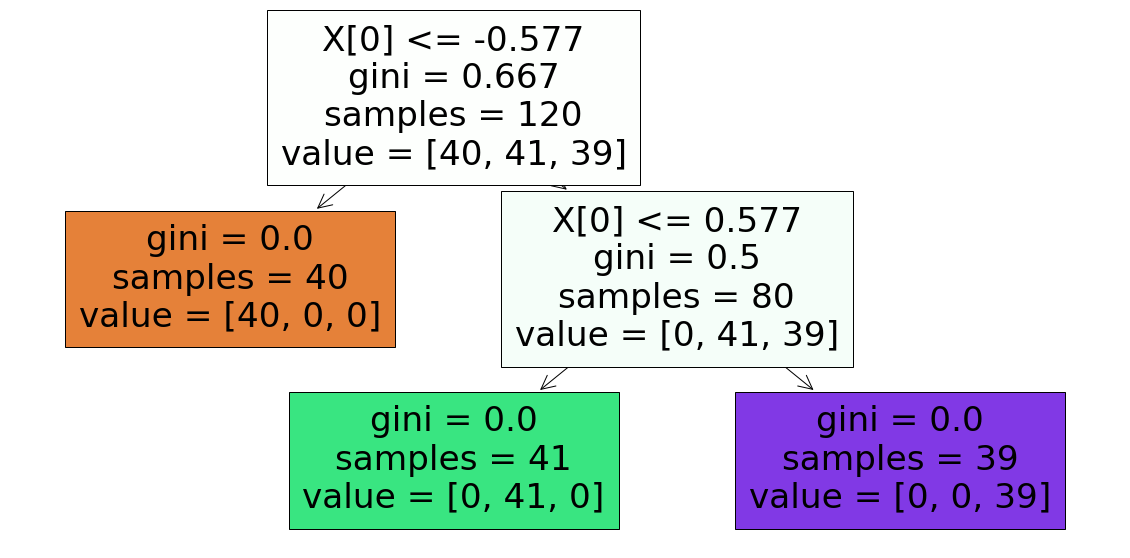

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree.fit(X_train,y_train),filled=True)
plt.show()

In [52]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# KNN Algorithm

In [53]:
knn=KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
pred=knn.predict(X_test)

In [56]:
print(confusion_matrix(y_test,pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Naive Bayes

In [61]:
gauss = GaussianNB()

In [62]:
gauss.fit(X_train,y_train)

GaussianNB()

In [63]:
y_pred = gauss.predict(X_test)

In [64]:
cm = confusion_matrix(y_test,y_pred)

In [65]:
print("Confusion matrix of K Nearest Neighbour\n",cm)

Confusion matrix of K Nearest Neighbour
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
